In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from time import strptime
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("bank-full.csv", sep = ";")

# change month to numeric
data['month'] = [strptime(str(x), '%b').tm_mon for x in data['month']]
# change all object data type to categorical
list_str_obj_cols = data.columns[data.dtypes == "object"].tolist()
for str_obj_col in list_str_obj_cols:
    data[str_obj_col] = data[str_obj_col].astype("category")

# encode all categorical data
df_encoded = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default',
                                           'housing', 'loan', 'contact', 'poutcome'], )

# standardize all numeric data
data_numeric = data[["age", "balance", "day", "duration", "campaign", "pdays", "previous", "month"]]

std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(data_numeric.to_numpy())
df_scaled = pd.DataFrame(df_scaled,
                         columns=["age", "balance", "day", "duration", "campaign", "pdays", "previous", "month"])

# combine both datasets
df_encoded.update(df_scaled)

# change class label to 0 and 1
df_encoded.y = pd.Categorical(df_encoded.y).codes
newdata = df_encoded

X = newdata.drop(["y"], axis=1)
y = newdata["y"]

#used for parameter tuning
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .8)

In [5]:

#from sklearn.model_selection import cross_validate 
from sklearn.model_selection import cross_validate 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, matthews_corrcoef

# basic
#mcc_scorer = make_scorer(matthews_corrcoef)
model = LogisticRegression() 
cv_results = cross_validate(model, X, y, cv=5, 
                            return_train_score=True, 
                            scoring= {"MCC": make_scorer(matthews_corrcoef), "Accuracy": "accuracy"}) 
cv_results
import numpy as np
print("train MCC:",np.mean(cv_results['train_MCC']))
print("test MCC:",np.mean(cv_results['test_MCC']))

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import matthews_corrcoef, accuracy_score
import numpy as np
from imblearn.over_sampling import SMOTE

# Initialize the lr model
model = LogisticRegression() 

# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# For storing results
train_mcc_scores = []
test_mcc_scores = []

# Loop through each fold
for train_index, test_index in skf.split(X, y):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    # Apply SMOTE only to the training set
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    
    # Train the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict and compute MCC for the training data
    train_preds = model.predict(X_train_resampled)
    train_mcc = matthews_corrcoef(y_train_resampled, train_preds)
    train_mcc_scores.append(train_mcc)
    
    # Predict and compute MCC for the testing data
    test_preds = model.predict(X_test)
    test_mcc = matthews_corrcoef(y_test, test_preds)
    test_mcc_scores.append(test_mcc)

# Print the average MCC scores
print("Train MCC:", np.mean(train_mcc_scores))
print("Test MCC:", np.mean(test_mcc_scores))


C:\Users\jiaqi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jiaqi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

train MCC: 0.43168785673999954
test MCC: 0.3181497538700998


C:\Users\jiaqi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jiaqi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Train MCC: 0.7703635605081034
Test MCC: 0.47043415065330246


C:\Users\jiaqi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Stratified KFold with SMOTE
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_mcc_scores = []
test_mcc_scores = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    model.fit(X_train_resampled, y_train_resampled)
    
    train_preds = model.predict(X_train_resampled)
    train_mcc = matthews_corrcoef(y_train_resampled, train_preds)
    train_mcc_scores.append(train_mcc)
    
    test_preds = model.predict(X_test)
    test_mcc = matthews_corrcoef(y_test, test_preds)
    test_mcc_scores.append(test_mcc)

train_MCC_smote = np.mean(train_mcc_scores)
test_MCC_smote = np.mean(test_mcc_scores)


C:\Users\jiaqi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jiaqi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [17]:
# Parameter tuning with GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model = LogisticRegression() 
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
tuning = GridSearchCV(estimator=model, param_grid=parameters, n_jobs=-1, verbose=2, cv=5, refit=True, scoring=make_scorer(matthews_corrcoef))
tuning.fit(X_resampled, y_resampled)
pred = tuning.predict(X_test)
test_MCC_tuned = matthews_corrcoef(y_test, pred)

best_params = tuning.best_params_
best_score = tuning.best_score_

train_MCC_basic, test_MCC_basic, train_MCC_smote, test_MCC_smote, test_MCC_tuned, best_params, best_score

Fitting 5 folds for each of 12 candidates, totalling 60 fits


(0.43168785673999954,
 0.3181497538700998,
 0.7703635605081034,
 0.47043415065330246,
 0.4409208942618563,
 {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'},
 0.7652093595460207)

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import matthews_corrcoef
from imblearn.over_sampling import SMOTE
import numpy as np

# Initialize the logistic regression model with the provided hyperparameters
model = LogisticRegression(C=1, penalty='l2', solver='liblinear')

# Initialize Stratified KFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# For storing results
train_mcc_scores = []
test_mcc_scores = []

# Loop through each fold
for train_index, test_index in skf.split(X, y):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE only to the training set
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # Train the model on the resampled training data
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict and compute MCC for the training data
    train_preds = model.predict(X_train_resampled)
    train_mcc = matthews_corrcoef(y_train_resampled, train_preds)
    train_mcc_scores.append(train_mcc)
    
    # Predict and compute MCC for the testing data
    test_preds = model.predict(X_test)
    test_mcc = matthews_corrcoef(y_test, test_preds)
    test_mcc_scores.append(test_mcc)

# Compute the average MCC scores
train_MCC_avg = np.mean(train_mcc_scores)
test_MCC_avg = np.mean(test_mcc_scores)

train_MCC_avg, test_MCC_avg


(0.7710904675593973, 0.46993897914292254)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from time import strptime
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# ... (Your previous code to load and preprocess the data)

# Train a logistic regression model
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train, y_train)

# Get feature importance (coefficients) from the logistic regression model
feature_importance = logistic_model.coef_[0]

# Create a DataFrame to associate feature names with their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance
print(feature_importance_df)


                Feature  Importance
38     poutcome_success    1.771496
4              duration    1.058521
16          job_student    0.641420
13          job_retired    0.521212
33     contact_cellular    0.462350
29           housing_no    0.400376
34    contact_telephone    0.337029
31              loan_no    0.286656
25   education_tertiary    0.185588
8            job_admin.    0.184323
22       marital_single    0.152842
27           default_no    0.072155
1               balance    0.057084
26    education_unknown    0.046959
18       job_unemployed    0.042394
20     marital_divorced    0.028682
7              previous    0.021717
0                   age    0.016839
6                 pdays    0.012269
24  education_secondary   -0.028732
2                   day   -0.041570
3                 month   -0.047641
12       job_management   -0.050398
17       job_technician   -0.073971
28          default_yes   -0.080983
19          job_unknown   -0.082909
14    job_self-employed   -0

C:\Users\jiaqi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


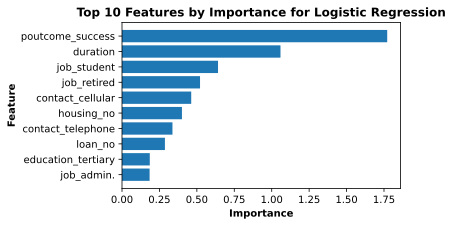

In [28]:
# Plot
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(figsize=(5, 3))


plt.barh(top_10_features['Feature'], top_10_features['Importance'], align='center')
plt.xlabel('Importance', weight='bold')
plt.ylabel('Feature', weight='bold')
plt.title('Top 10 Features by Importance for Logistic Regression', weight='bold')
plt.gca().invert_yaxis()  # to have the feature with the highest importance at the top

# Save the figure before calling show
plt.savefig('top_10_features.png', bbox_inches='tight', dpi=300)

plt.show()
